In [1]:
%load_ext watermark
%watermark

Last updated: 2022-12-02T16:05:54.271696-05:00

Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.7.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import cv2

import os

from gtts import gTTS

import pytesseract

from progressbar import ProgressBar

from concurrent.futures import ThreadPoolExecutor

(-0.5, 719.5, 1599.5, -0.5)

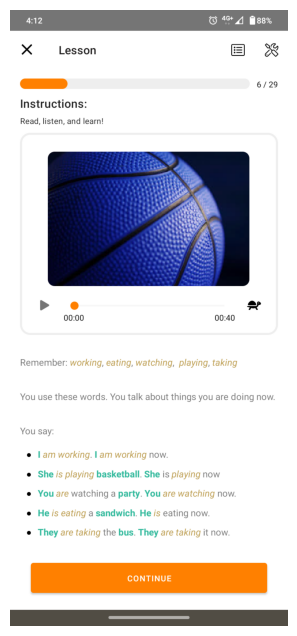

In [3]:
path = '_resources/img/Screenshot_20210530-161202.png'
img = cv2.imread(path)

plt.figure(figsize=(6, 8))
plt.imshow(img, cmap='bone')
plt.axis('off')

In [4]:
def image_to_string(path):
    img = cv2.imread(path)

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray, img_bin = cv2.threshold(gray, 128, 255,
                                  cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    gray = cv2.bitwise_not(img_bin)

    kernel = np.ones((2, 1), np.uint8)
    img = cv2.erode(gray, kernel, iterations=1)
    img = cv2.dilate(img, kernel, iterations=1)

    return pytesseract.image_to_string(img)


image_to_string(path)

'88%\n\nxX Lesson =] X&\n\nGD 6/29\n\nInstructions:\n\nRead, listen, and learn!\n\n¥\n\n>\n\n00:00 00:40\n\nRemember working, eadag, walehing, playing, biking\n\nYou use these words. Yau talk about things you are doing now.\n\nYou say:\ne Lan working. baat working now.\ne@ She fs playing basketball. She is playing now\ne You.we watching a party. You ure walching naw,\n\ne Hejs cating a sandwich. He js cating now.\n\nThey ire liking the bus. They aro faking it now.\n'

Se obtienen los textos a partir de las imágenes.

In [5]:
raw_text_df = pd.DataFrame(columns=['name', 'text'])
raw_text_df.set_index(keys='name', inplace=True)

path = os.listdir('_resources/img')

bar = ProgressBar(maxval=len(path)).start()
i = 0


def gen_string(name):
    text = image_to_string(f'_resources/img/{name}')

    name = name.split('.')[0]
    raw_text_df.loc[name] = [text]

    global i
    i += 1
    bar.update(i)


with ThreadPoolExecutor(max_workers=16) as executor:
    futures = [executor.submit(gen_string, name) for name in path]

bar.finish()

raw_text_df.head(10)

100% |########################################################################|


,text
name,
Screenshot_20210530-161706,4:17 4g 88%\n\nx Lesson oS\n\nSD 12/29\n\nInst...
Screenshot_20210530-165004,450 (9 @ @ 4s 84%\n\nx Lesson &\n\nGD 8/29\n\n...
Screenshot_20210530-164837,84%\n\nx Lesson fs\n\nGD 6/29\n\nInstructions:...
Screenshot_20210530-163826,85%\n\nxX Lesson =] X&\n\nSD 12/29\n\nInstruct...
Screenshot_20210528-103849,Pa 88%\nx Lesson as\n\nD> 10/28\n\nInstruction...
Screenshot_20210530-165331,83%\n\nx Lesson as\n\nSD 12/29\n\nInstructions...
Screenshot_20210530-161202,88%\n\nxX Lesson =] X&\n\nGD 6/29\n\nInstructi...
Screenshot_20210530-161416,"GD 8/29\n\nInstructions:\n\nRead, listen, and ..."
Screenshot_20210530-161534,ow 88%\n\nx Lesson as\n\nGD 10/29\nInstruction...


- Se guarda el dataframe.
- El dataframe debe ser limpiado manualmente.

In [6]:
raw_text_df.to_csv(path_or_buf='_resources/raw_text_df.csv')

Se carga el dataframe limpiado manualmente.

In [7]:
text_np = pd.read_csv(filepath_or_buffer='_resources/text_df.csv').to_numpy()
text_np.shape

(24, 2)

Se generan los audios a partir de los textos.

In [8]:
bar = ProgressBar(maxval=text_np.shape[0]).start()
i = 0


def save_audio(name, text):
    path = f'_resources/audio/{name}.mp3'

    try:
        if os.path.exists(path) == True:
            raise ValueError()

        gtts = gTTS(text=text, lang='en', slow=False)
        gtts.save(path)
    except ValueError:
        pass
    except Exception as e:
        #         print(e)
        os.remove(path)
    finally:
        global i
        i += 1
        bar.update(i)


with ThreadPoolExecutor(max_workers=12) as executor:
    futures = [executor.submit(save_audio, e[0], e[1])
               for e in text_np]

    executor.shutdown(wait=True)

bar.finish()

100% |########################################################################|
